# QUESTION 1 

Part a and b done at beginning of PDF (written on iPad)

In [1]:
import numpy as np
from scipy.integrate import trapz, cumtrapz
from scipy.special import factorial
import matplotlib
import matplotlib.pyplot as plt

Here I define my likelihood, prior and posterior. 

## Question 1c)

In [2]:
def likelihood(S, N=50):
    A = 10
    S_mean = A*S
    return (np.exp(-S_mean))*((S_mean)**N)/factorial(N)

def prior(S):
    return (1/S*np.log10(100))

def posterior(S):
    return prior(S)*likelihood(S) 

The calculation of the evidence is performed in the following cell where i have defined a range of values that S can take and used the trapezium rule to integrate over these values.

0.03999999950341349
Smax = 4.900000000000004


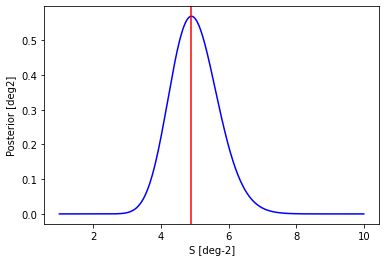

Mean = 4.99999993569581


In [3]:
ds = 0.01
Svalues = np.arange(1., 10., ds)
postvalues = posterior(Svalues)
Z = np.trapz(postvalues, x=Svalues)

print(Z)
plt.plot(Svalues, postvalues/Z, 'b-')

plt.xlabel("S [deg-2]")
plt.ylabel("Posterior [deg2]")
max_y = max(postvalues/Z)  # Find the maximum y value
max_x = Svalues[(postvalues/Z).argmax()]  # Find the x value corresponding to the maximum y value
print('Smax =', max_x)
plt.axvline(x = max_x, color = 'r', label = 'L0max')
plt.show()
mean = np.trapz(Svalues*postvalues/Z, x=Svalues)
print("Mean =", mean)

## Question 1d)

The following cell Calculates the uncertanty of our measurement outside of our 90% central data - i have calcualted the 5% percentile and the 95% percentile.
The values of these are the limits of the error and the difference in these values from the mean is the error.
Using the cumtrapz module (inbuilt in Scipy) allows me to find the cumulutive value of the integration up to a the required percentile.

In [4]:
cum_p = cumtrapz(postvalues*ds/Z)
sign_u = np.sign(cum_p-0.95)
#print(sign_u)
upper = Svalues[np.where(np.diff(sign_u))]
print('Upper bound of the first survey = ',upper)

sign_l = np.sign(cum_p-0.05)
#print(sign_l)
lower = Svalues[np.where(np.diff(sign_l))]
print('Lower bound of the first survey = ',lower)

Upper bound of the first survey =  [6.2]
Lower bound of the first survey =  [3.88]


The follow is the finding the difference of the values above from the mean and thus calculating our errors.

In [5]:
Upper_error = upper - mean
lower_error = mean - lower
print(Upper_error)
print(lower_error)

[1.20000006]
[1.11999994]


Here we see that the uncertainties are: 
Upper bound -> 5.00+1.20 and
Lower bound -> 5.00-1.12

The following cell Calculates the uncertanty of our measurement outside of our 68% central data - i have calcualted the 16% percentile and the 84% percentile. 
The values of these are the limits of the error and the difference in these values from the mean is the error.
Using the cumtrapz module (inbuilt in Scipy) allows me to find the cumulutive value of the integration up to a the required percentile.

In [6]:
cum_p = cumtrapz(postvalues*ds/Z)
sign_u = np.sign(cum_p-0.84)
#print(sign_u)
upper = Svalues[np.where(np.diff(sign_u))]
print('Upper bound of the first survey = ',upper)

sign_l = np.sign(cum_p-0.16)
#print(sign_l)
lower = Svalues[np.where(np.diff(sign_l))]
print('Lower bound of the first survey = ',lower)

Upper bound of the first survey =  [5.69]
Lower bound of the first survey =  [4.28]


The follow is the finding the difference of the values above from the mean and thus calculating our errors.

In [7]:
Upper_error = upper - mean
lower_error = mean - lower
print(Upper_error)
print(lower_error)

[0.69000006]
[0.71999994]


Here we see that the uncertainties are:
Upper bound -> 5.00+0.69 and
Lower bound -> 5.00-0.72

I have calculated the errors for both a central percentage of 68% and 90% to present two methods of calculatng uncertainties on our survey.

## Question 1e)

The following cell defines the new posterior of the new data that we are given. 
I then plot both graphs on the same graph to see the distribution between them both.

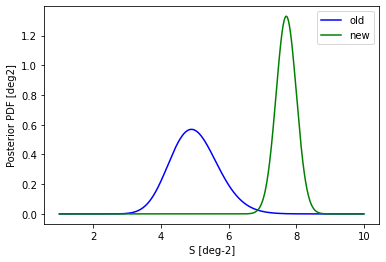

In [8]:
def new_posterior(S, mu=7.7, sig=0.3):
    return np.exp(-0.5*((S-mu)/sig)**2)/np.sqrt(2*np.pi*sig**2)

new_post_values = new_posterior(Svalues)
#print(new_post_values)
plt.plot(Svalues, postvalues/Z, 'b-', label='old')
plt.plot(Svalues, new_post_values,'g-', label='new')

plt.xlabel("S [deg-2]")
plt.ylabel("Posterior PDF [deg2]")

plt.legend()
plt.show()


This cell combines both previous graphs by taking our posterior for our new graph and using it as the prir to find the posterior of both graphs combined.
The most probable value of S is now approx. 7.4 which is increase from our previous estimation.
This change is due to being supplied with new information (data) from the second survey allowing us to improve our posterior further and thus obtain a better estimate for S.

0.00040417423344560923
Smax = 7.4100000000000055


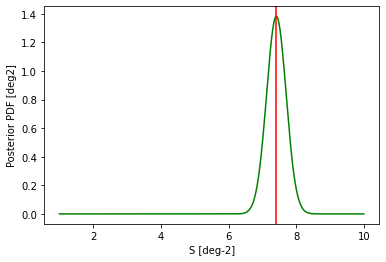

mean = 7.4083472200945195


In [11]:
#using new posterior as new prior 

def new_new_posterior(S):
    return likelihood(S)*new_posterior(S)

values = new_new_posterior(Svalues)
z = np.trapz(values, x = Svalues)
#print(values)
plt.plot(Svalues, values/z,'g-', label='new')
print(z)
plt.xlabel("S [deg-2]")
plt.ylabel('Posterior PDF [deg2]')
max_y1 = max(postvalues/Z)  # Find the maximum y value
max_x1 = Svalues[(values/Z).argmax()]  # Find the x value corresponding to the maximum y value
print('Smax =', max_x1)
plt.axvline(x = max_x1, color = 'r', label = 'L0max')
plt.show()
print("mean =", np.trapz(Svalues*values/z, x=Svalues))

HOWEVER, it can be argued that this does not give us an accurate answer. The following cell explores the lowest percetile (5%) of the new survey compared to the 95% percentile of the first survey and we see that these values do not lie within one another hence depicting that the value os S = 7.4 is not entirely accurate/fair.

We see that the upper bound of the first survey is still less than the lower bound of the second survey thus depicting an inaccurate calculation of S.

A reason as to why the two surveys differ greatly is due to more survey data being used in the second survey and thus a more accurate value of the mean is provided. However, their values may differ greatly if the first and second survey perhaps point at different areas of the sky and thus isnt consistent.

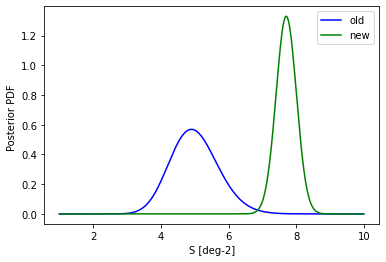

Upper bound of the old survey = [6.2]
Lower bound of the new surey = [6.45]


In [10]:
plt.plot(Svalues, postvalues/Z, 'b-', label='old')
plt.plot(Svalues, new_post_values,'g-', label='new')

plt.xlabel("S [deg-2]")
plt.ylabel("Posterior PDF ")

plt.legend()
plt.show()

cum_postfirstsurvey = cumtrapz(postvalues*ds/Z)

sign_upper = np.sign(cum_postfirstsurvey-0.95)
#print(sign_l)
upperoldsurvey = Svalues[np.where(np.diff(sign_upper))]
print('Upper bound of the old survey =' ,upperoldsurvey)

cum_postsecondsurvey = cumtrapz(new_post_values*ds/z)

sign_lower = np.sign(cum_postsecondsurvey-0.05)
#print(sign_l)
lowernewsurvey = Svalues[np.where(np.diff(sign_lower))]
print('Lower bound of the new surey =', lowernewsurvey)